In [658]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from sklearn.preprocessing import MinMaxScaler, PowerTransformer, StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.cluster import KMeans


%matplotlib inline

In [659]:
df = pd.read_csv('D:/PROJECTS/CLUSTRING/Online Retail.csv')
df = df.sample(10000, random_state=42)

In [660]:
df.head(20)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
209268,555200,71459,HANGING JAM JAR T-LIGHT HOLDER,24,01/06/2011 12:05,0.85,17315.0,United Kingdom
207108,554974,21128,GOLD FISHING GNOME,4,27/05/2011 17:14,6.95,14031.0,United Kingdom
167085,550972,21086,SET/6 RED SPOTTY PAPER CUPS,4,21/04/2011 17:05,0.65,14031.0,United Kingdom
471836,576652,22812,PACK 3 BOXES CHRISTMAS PANETTONE,3,16/11/2011 10:39,1.95,17198.0,United Kingdom
115865,546157,22180,RETROSPOT LAMP,2,10/03/2011 8:40,9.95,13502.0,United Kingdom
465024,576200,82482,WOODEN PICTURE FRAME WHITE FINISH,2,14/11/2011 12:14,2.95,15572.0,United Kingdom
477777,577076,22614,PACK OF 12 SPACEBOY TISSUES,12,17/11/2011 15:08,0.39,14362.0,United Kingdom
367855,568909,22596,CHRISTMAS STAR WISH LIST CHALKBOARD,12,29/09/2011 13:38,1.25,16818.0,United Kingdom
491657,578072,21109,LARGE CAKE TOWEL CHOCOLATE SPOTS,1,22/11/2011 16:02,6.75,17759.0,United Kingdom
269641,560491,23297,SET 40 HEART SHAPE PETIT FOUR CASES,2,19/07/2011 10:51,1.65,12415.0,Australia


In [661]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 209268 to 336297
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   InvoiceNo    10000 non-null  object 
 1   StockCode    10000 non-null  object 
 2   Description  9969 non-null   object 
 3   Quantity     10000 non-null  int64  
 4   InvoiceDate  10000 non-null  object 
 5   UnitPrice    10000 non-null  float64
 6   CustomerID   7484 non-null   float64
 7   Country      10000 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 703.1+ KB


In [662]:
df['InvoiceDate'] = pd.to_datetime(df.InvoiceDate)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 209268 to 336297
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   InvoiceNo    10000 non-null  object        
 1   StockCode    10000 non-null  object        
 2   Description  9969 non-null   object        
 3   Quantity     10000 non-null  int64         
 4   InvoiceDate  10000 non-null  datetime64[ns]
 5   UnitPrice    10000 non-null  float64       
 6   CustomerID   7484 non-null   float64       
 7   Country      10000 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 703.1+ KB


In [663]:
df = df[df['CustomerID'].notna()]
df['Monetary'] = df['UnitPrice'] * df['Quantity']

## RFM Analysis
1. For *Recency*, Calculate the number of days between present date and date of last purchase each customer.
2. For *Frequency*, Calculate the number of orders for each customer.
3. For *Monetary*, Calculate sum of purchase price for each customer.

In [664]:
customers = df.groupby('CustomerID').agg({
                                           'InvoiceDate': lambda x: ((df.InvoiceDate.max() + datetime.timedelta(days=1)) - x.max()).days,
                                           'InvoiceNo': 'count',
                                           'Monetary': 'sum'
                                        })
customers.rename(columns={'InvoiceNo': 'Frequency', 'InvoiceDate': 'Recency'}, inplace=True)
customers

,Recency,Frequency,Monetary
CustomerID,,,
12347.0,96,5,81.60
12349.0,20,1,19.90
12353.0,205,1,39.80
12354.0,234,2,25.45
12356.0,327,1,50.00
...,...,...,...
18263.0,27,5,114.88
18270.0,268,2,68.50
18272.0,152,3,52.20


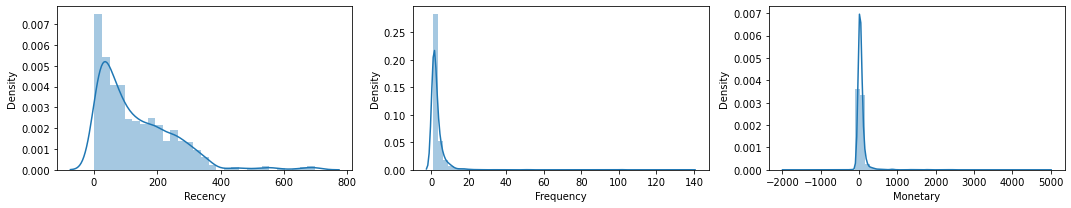

In [665]:
fig, ax = plt.subplots(1, 3, figsize=(15,3))
sns.distplot(customers['Recency'], ax=ax[0])
sns.distplot(customers['Frequency'], ax=ax[1])
sns.distplot(customers['Monetary'], ax=ax[2])
plt.tight_layout()
plt.show()

In [666]:
scalar = MinMaxScaler(feature_range=(1, 2))
power = PowerTransformer(method='box-cox')
pipeline = make_pipeline(scalar, power)
cust = pipeline.fit_transform(customers)
cust = pd.DataFrame(cust)
cust.columns = customers.columns
customers_normalized = cust
customers_normalized

,Recency,Frequency,Monetary
0,-0.085359,1.340113,0.204944
1,-1.218306,-0.960187,-0.226597
2,0.894007,-0.960187,-0.085590
3,1.075279,-0.074510,-0.187094
4,1.515633,-0.960187,-0.013993
...,...,...,...
2428,-1.091180,1.340113,0.430909
2429,1.258273,-0.074510,0.114705
2430,0.487057,0.559099,0.001390
2431,0.469430,2.069985,-0.173531


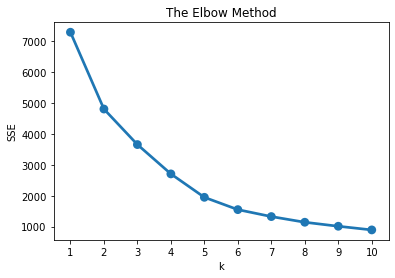

In [667]:
sse = {}
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(customers_normalized)
    sse[k] = kmeans.inertia_ # SSE to closest cluster centroid
plt.title('The Elbow Method')
plt.xlabel('k')
plt.ylabel('SSE')
sns.pointplot(x=list(sse.keys()), y=list(sse.values()))
plt.show()

In [668]:
model = KMeans(n_clusters=3, random_state=42)
model.fit(customers_normalized)
model.labels_.shape

(2433,)

In [669]:
customers["Cluster"] = model.labels_
customers.groupby('Cluster').agg({
    'Recency':'mean',
    'Frequency':'mean',
    'Monetary':['mean', 'count']}).round(2)

Recency Frequency Monetary      
           mean      mean     mean count
Cluster                                 
0         57.72      7.87   172.89   562
1        242.34      1.56    25.17  1011
2         52.03      1.73    29.32   860

<AxesSubplot:xlabel='Attribute', ylabel='Value'>

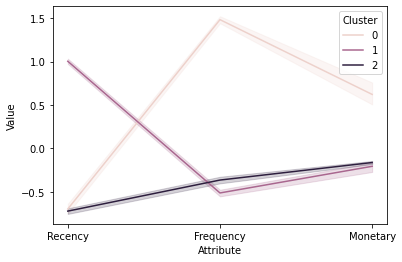

In [670]:
# Create the dataframe
df_normalized = pd.DataFrame(customers_normalized, columns=['Recency', 'Frequency', 'Monetary'])
df_normalized['ID'] = customers.index
df_normalized['Cluster'] = model.labels_
# Melt The Data
df_nor_melt = pd.melt(df_normalized.reset_index(),
                      id_vars=['ID', 'Cluster'],
                      value_vars=['Recency','Frequency','Monetary'],
                      var_name='Attribute',
                      value_name='Value')
df_nor_melt.head()
# Visualize it
sns.lineplot('Attribute', 'Value', hue='Cluster', data=df_nor_melt)

## Observations
- Customers that belong to cluster 0 are more frequent and generated highest revenue that meant we can say the love our products. Also they visited the store.
- Customers that belong to cluster 2 are less as compared to 0 but more than 1.
- 1st cluster groups might not be satisfied with our services since they produced very less revenue and visited store long ago.